In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
%matplotlib inline

In [12]:
from statsmodels.tsa.ar_model import AutoReg, ARResults, AR

In [3]:
df = pd.read_csv('../../Time-series-analysis/Data/uspopulation.csv',index_col='DATE', parse_dates=True)
df.index.freq = 'MS'

<Axes: xlabel='DATE'>

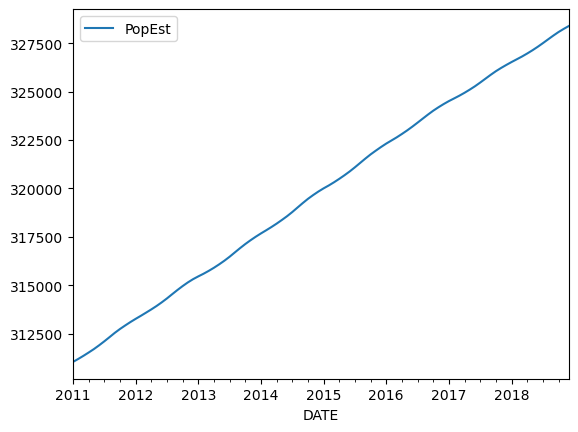

In [4]:
df.plot()

In [5]:
len(df)

96

In [6]:
train = df.iloc[:84]
test = df.iloc[84:]

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
model = AutoReg(train['PopEst'], lags=1)

In [17]:
auto_reg_fit = model.fit()

In [19]:
start = len(train)
end = len(train) + len(test) +1 

In [21]:
pred = auto_reg_fit.predict(start=start, end = end)

In [25]:
pred = pred.rename('Predictions')

In [27]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [28]:
pred

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
2019-01-01    328744.780407
2019-02-01    328926.440413
Freq: MS, Name: Predictions, dtype: float64

<Axes: xlabel='DATE'>

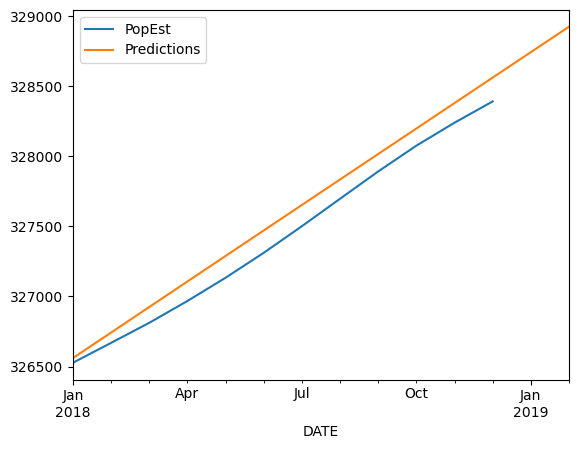

In [30]:
test.plot(legend=True)
pred.plot(legend=True)